# Existen 3 buenos metodos para optimizar el modelo en forma de backpropagation

#### ADAM
#### SGD
#### rmsPROP

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

## creamos la distribucion para la prueba TOMANDO EN CUENTA SOLO 1000 IMAGENES

In [4]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('data/train/malignant','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('data/train/benign','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [5]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")

en total tenemos: 2637 imagenes dentro de la carpeta train


In [6]:
porcion1=dataTr[0:700]
porcion2=dataTr[701:1001]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de test")

para entrenamiento tendremos: 700 imagenes de la carpeta de train
para prueba tendremos: 300 imagenes de la carpeta de test


In [7]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [8]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

# CREAMOS LAS CAPAS DE LA CONVOLUCION Y RN

In [9]:
def creacion_modelo():
    modelo=Sequential()
    modelo.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
    modelo.add(MaxPooling2D(pool_size=((2,2))))
    modelo.add(Flatten())
    modelo.add(Dense(128,activation='relu'))
    modelo.add(Dense(150,activation='relu'))
    modelo.add(Dense(150,activation='relu'))
    modelo.add(Dense(1,activation='sigmoid'))
    return modelo

## Importamos la libreria de KERAS donde se almacenan los metodos de Descenso de Gradiente

In [10]:
from tensorflow import keras

#### pondremos el valor que biene por defecto en el learning rate que es del 0.002

In [11]:
lr=0.002

In [12]:
def validacion(x_e,y_e,x_p,y_p,model,epocas):
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=model.evaluate(x_p,y_p)
    return a[1]

In [13]:
def evaluacion(modelo,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break   

## metodo ADAM

In [22]:
modelo1=creacion_modelo()

In [23]:
modelo_adam = keras.optimizers.Adam(learning_rate=lr)
modelo1.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
v_eA=[]
v_aA=[]
evaluacion(modelo1,80,"ADAM",v_eA,v_aA)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 31.7744 - acc: 0.4533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 8.9569 - acc: 0.6933
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 9.2342 - acc: 0.5667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 6.7400 - acc: 0.7167
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6969 - acc: 0.7833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 8.9401 - acc: 0.7533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.1124 - acc: 0.7400
Train on 700 samples, validate on 300 samples
300/300 [====================

In [33]:
modelo1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               50466944  
_________________________________________________________________
dense_10 (Dense)             (None, 150)               19350     
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

## metodo SGD

In [14]:
modelo2=creacion_modelo()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
modelo_sgd = keras.optimizers.SGD(learning_rate=lr)
modelo2.compile(optimizer=modelo_sgd,loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
v_eS=[]
v_aS=[]
evaluacion(modelo2,80,"SGD",v_eS,v_aS)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7340 - acc: 0.6833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.6988 - acc: 0.7033
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7308 - acc: 0.7133
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7192 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7470 - acc: 0.7033
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7507 - acc: 0.7000
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7568 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [=====================

300/300 [==============================] - 1s 2ms/sample - loss: 0.9186 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8711 - acc: 0.7000
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8994 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9278 - acc: 0.7400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8639 - acc: 0.7033
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9183 - acc: 0.7133
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8748 - acc: 0.7133
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9040 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 0.9562 - acc: 0.7400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0646 - acc: 0.7167
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9835 - acc: 0.7000
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9557 - acc: 0.7100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0087 - acc: 0.7100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9220 - acc: 0.6800
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8453 - acc: 0.7000
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9201 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 0.9911 - acc: 0.6867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0328 - acc: 0.6733
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9299 - acc: 0.6933
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9481 - acc: 0.6900
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9210 - acc: 0.6933
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0157 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.1155 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0158 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 0.7911 - acc: 0.7167
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9555 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.2116 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.1238 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.2170 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.1808 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0811 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.2447 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.4691 - acc: 0.5800
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.4007 - acc: 0.6100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.2764 - acc: 0.6400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.3417 - acc: 0.6200
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.4583 - acc: 0.5867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.3316 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8391 - acc: 0.7100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.1844 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.6248 - acc: 0.6033
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5053 - acc: 0.6400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5770 - acc: 0.6167
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.2557 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.4629 - acc: 0.6367
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5136 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5228 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.4837 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.5818 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5865 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5844 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5777 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5241 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5233 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5325 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5314 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.5969 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6017 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5938 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5966 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6013 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6175 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6037 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5985 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.6075 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6047 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6109 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6091 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6213 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5989 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6065 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6075 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.5982 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6016 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5901 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6082 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5971 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5998 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5978 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6023 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.6134 - acc: 0.6700
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6095 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6058 - acc: 0.6733
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6113 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6763 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6124 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6021 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.1943 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.1901 - acc: 0.6933
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.2088 - acc: 0.7200
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0326 - acc: 0.6900
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.1298 - acc: 0.7133
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7829 - acc: 0.6233
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0640 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0866 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.2931 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.9293 - acc: 0.7133
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8956 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8966 - acc: 0.7100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.0659 - acc: 0.7400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.1412 - acc: 0.7033
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5116 - acc: 0.7300
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9618 - acc: 0.7400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.9164 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 2.1786 - acc: 0.7167
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6393 - acc: 0.7233
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.4560 - acc: 0.6867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.9049 - acc: 0.7233
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.4770 - acc: 0.7100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7833 - acc: 0.7300
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.6675 - acc: 0.6833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.5265 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 2.7863 - acc: 0.7033
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.8265 - acc: 0.6833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.0010 - acc: 0.6200
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.9132 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.8677 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.8081 - acc: 0.6833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.8573 - acc: 0.6867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 2.8991 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 3.0052 - acc: 0.7300
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.4117 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.2143 - acc: 0.7067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.3975 - acc: 0.6733
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.3584 - acc: 0.6833
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.3734 - acc: 0.6867
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.4349 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 3.4428 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 2.8432 - acc: 0.6300
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7072 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.8520 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.6690 - acc: 0.6067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.6685 - acc: 0.6067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.6717 - acc: 0.6067
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.6757 - acc: 0.6267
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 0.7080 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.7501 - acc: 0.6400
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7326 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7720 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7517 - acc: 0.6433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7275 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8262 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7415 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8769 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.4728 - acc: 0.6900
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6554 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.6843 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7218 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7779 - acc: 0.6333
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7008 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7023 - acc: 0.6533
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7180 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.7492 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7524 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7670 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7531 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7542 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7557 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7584 - acc: 0.6500
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7527 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.7656 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7662 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7757 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7676 - acc: 0.6567
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7668 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7729 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7770 - acc: 0.6600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7669 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.7853 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7802 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7869 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7855 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7859 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7890 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7889 - acc: 0.6767
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.7897 - ac

300/300 [==============================] - 1s 2ms/sample - loss: 1.8045 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8050 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8045 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8063 - acc: 0.6667
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8088 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8057 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8101 - acc: 0.6633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 2ms/sample - loss: 1.8067 - ac

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_5192\3377308904.py", line 3, in <module>
    evaluacion(modelo2,80,"SGD",v_eS,v_aS)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_5192\1219012479.py", line 6, in evaluacion
    prediccion=(validacion(x_e,y_e,x_p,y_p,modelo,1))*100
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_5192\2902134277.py", line 2, in validacion
    entre=model.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.py", line 675, in fit
    steps_n

## metodo RMSprop

In [29]:
modelo3=creacion_modelo()

In [30]:
modelo_RMSprop = keras.optimizers.RMSprop(learning_rate=lr)
modelo3.compile(optimizer=modelo_RMSprop,loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
v_eR=[]
v_aR=[]
evaluacion(modelo3,80,"RMSprop",v_eR,v_aR)

Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 2092.6328 - acc: 0.4333
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 114.1496 - acc: 0.5633
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 29.4581 - acc: 0.6467
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 4.5763 - acc: 0.7100
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 2.0196 - acc: 0.7433
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 2.1346 - acc: 0.7600
Train on 700 samples, validate on 300 samples
300/300 [==============================] - 1s 3ms/sample - loss: 12.1429 - acc: 0.5733
Train on 700 samples, validate on 300 samples
300/300 [==============

## Graficas respecto a los metodos de optimizacion de RMSProp y ADAM

In [32]:
#pip install matplotlib

In [33]:
%matplotlib inline
import matplotlib.pyplot as mp

In [34]:
print(v_aA)

[75.3333330154419, 76.99999809265137, 73.33333492279053, 77.66666412353516, 79.666668176651, 76.33333206176758, 79.3333351612091, 76.66666507720947, 79.666668176651, 80.0000011920929]


In [35]:
print(v_aR)

[43.33333373069763, 56.333333253860474, 64.66666460037231, 70.99999785423279, 74.33333396911621, 75.99999904632568, 57.33333230018616, 75.3333330154419, 73.66666793823242, 73.33333492279053, 78.33333611488342, 78.66666913032532, 78.33333611488342, 73.33333492279053, 75.66666603088379, 71.33333086967468, 73.00000190734863, 73.66666793823242, 76.66666507720947, 58.33333134651184, 75.0, 75.3333330154419, 56.66666626930237, 78.66666913032532, 79.00000214576721, 76.33333206176758, 76.66666507720947, 75.0, 73.00000190734863, 77.33333110809326, 75.0, 75.0, 77.66666412353516, 75.99999904632568, 73.66666793823242, 74.6666669845581, 75.0, 57.999998331069946, 75.0, 75.99999904632568, 74.6666669845581, 79.666668176651, 77.66666412353516, 79.00000214576721, 62.00000047683716, 63.999998569488525, 76.33333206176758, 80.0000011920929]


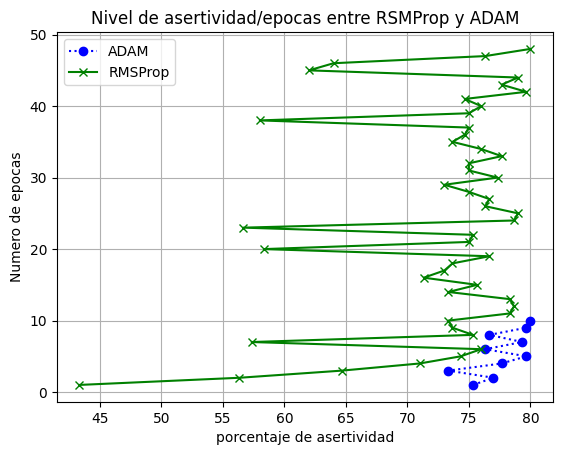

In [36]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")
mp.plot(v_aR,v_eR, marker='x', linestyle='-', color='g', label = "RMSProp")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad/epocas entre RSMProp y ADAM")
mp.grid(True)
mp.show()

In [37]:
print("asertividad del metodo ADAM: "+str(round(v_aA[-1],1))+"% alcanzado en: "+str(v_eA[-1])+ " epocas.")
print("asertividad del metodo RSMProp: "+str(round(v_aR[-1],1))+"% alcanzado en: "+str(v_eR[-1])+ " epocas.")

asertividad del metodo ADAM: 80.0% alcanzado en: 10 epocas.
asertividad del metodo RSMProp: 80.0% alcanzado en: 48 epocas.


## validando el modelo por LA CRUVA ROC

In [18]:
lr_probs = modelo1.predict_proba(x_p)

In [19]:
lr_probs = lr_probs[:, 0]

In [20]:
ns_probs = [0 for _ in range(len(y_p))]

In [21]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_p, ns_probs)
lr_auc = roc_auc_score(y_p, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Neuronal: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Red Neuronal: ROC AUC=0.865


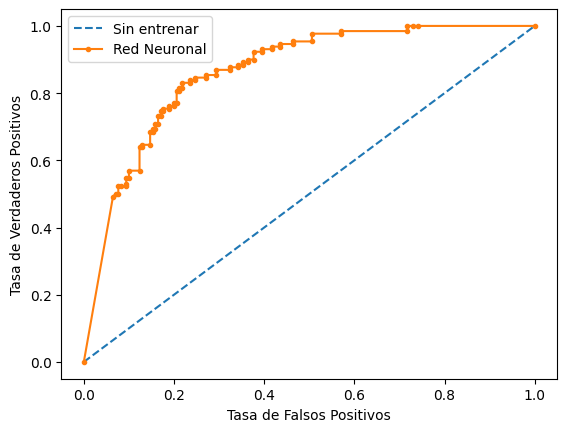

In [22]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_p, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_p, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Red Neuronal')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## sensibilidad y presicion

In [23]:
lr_probs = modelo1.predict_proba(x_p)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 0]

In [24]:
yhat = modelo1.predict(x_p)

In [25]:
lr_precision, lr_recall, _ = precision_recall_curve(y_p, lr_probs)

In [26]:
lr_auc =  auc(lr_recall, lr_precision)

In [27]:
no_skill = len(y_p[y_p==1]) / len(y_p)

Redes neuronales: auc=0.829


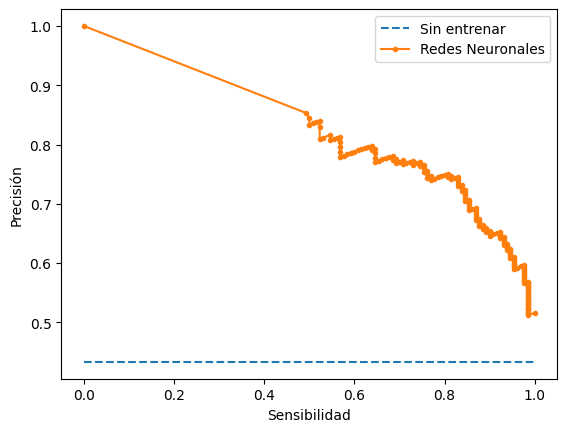

In [28]:
print('Redes neuronales: auc=%.3f' % (lr_auc))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Redes Neuronales')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()